In [14]:
import numpy as np
from plyfile import PlyData, PlyElement
import open3d as o3d
import utilities as uti

In [29]:
def convertArray(data):
    count = data['vertex'].count
    results = np.zeros((count,4))
    for i in range(count):
        results[i][0] = data['vertex'][i]['x']
        results[i][1] = data['vertex'][i]['y']
        results[i][2] = data['vertex'][i]['z']
        results[i][3] = data['vertex'][i]['quality']
    return results

def multipleCycle(single,multinum):
    result = single.copy()
    if multinum>=2:
        for i in range(multinum-1):
            result = np.append(result,single)
        return result
    else:
        print('Please chose a multinum > 1')

In [4]:
barycenter = []
for i in range(1,9):
    plydata = PlyData.read('./Mesh/results/jean normal/nonback_gauss_pose_'+str(i)+'.ply')
    arrdata = convertArray(plydata)
    ymax = np.amax(arrdata[:,1])
    ymin = np.amin(arrdata[:,1])
    right_knee = []
    for i in range(len(arrdata)):
        if arrdata[i][3] >= 100 and ((ymax-ymin)*0.2+ymin <= arrdata[i][1] <= (ymax-ymin)*0.3+ymin) and arrdata[i][0] > 0:
            right_knee.append(arrdata[i])
    right_knee = np.asarray(right_knee)
    barycenter.append(np.array([np.average(right_knee[:,0]),np.average(right_knee[:,1]),np.average(right_knee[:,2])]))
barycenter = np.asarray(barycenter)

32 32


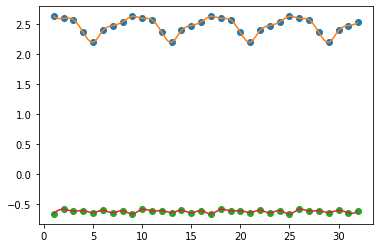

In [37]:
from scipy import interpolate
import matplotlib.pyplot as plt
cycle = 4
t = np.arange(1,8*cycle+1,1)
x = multipleCycle(barycenter[:,0],cycle)
y = multipleCycle(barycenter[:,1],cycle)
z = multipleCycle(barycenter[:,2],cycle)
print(len(t),len(z))
fx = interpolate.interp1d(t,x,kind='cubic')
fy = interpolate.interp1d(t,y,kind='cubic')
fz = interpolate.interp1d(t,z,kind='cubic')
tnew = np.arange(1,8*cycle,0.1)
znew = fz(tnew)
ynew = fy(tnew)
xnew = fx(tnew)
plt.plot(t,z, 'o', tnew, znew, '-')
plt.plot(t,y, 'o', tnew, ynew, '-')
plt.show()